#ASSIGNMENT 4

Date : 22 October 2022

Team ID : PNT2022TMID38414

Project Name : Intelligent Vehicle Damage Assessment & Cost Estimator for Insurance Companies

##1. Download the dataset

##2. Import required library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
import keras
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence



##3. Read Dataset and do Pre-processing

In [3]:
file ='/content/spam.tsv'
dataset = pd.read_csv(file,sep="\t")

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0    v1     5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
ps = PorterStemmer()

In [ ]:
review = dataset["v2"][0]
review

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
review = review.lower()
review

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [ ]:
review = review.split()
review

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...']

In [ ]:
nltk.download('stopwords')
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
review

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['go',
 'jurong',
 'point,',
 'crazy..',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'got',
 'amor',
 'wat...']

In [ ]:
sw = stopwords.words("english")
'wat' in sw

False

In [ ]:
dataset['v1'].value_counts()

In [ ]:
corpus = " ".join(dataset['v2'])

In [ ]:
corpus.split()

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'then',
 'say...',
 'Nah',
 'I',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 '�1.50',
 'to',
 'rcv',
 '

In [ ]:
wc = WordCloud( background_color='white')
review_wordcloud = wc.generate(corpus)

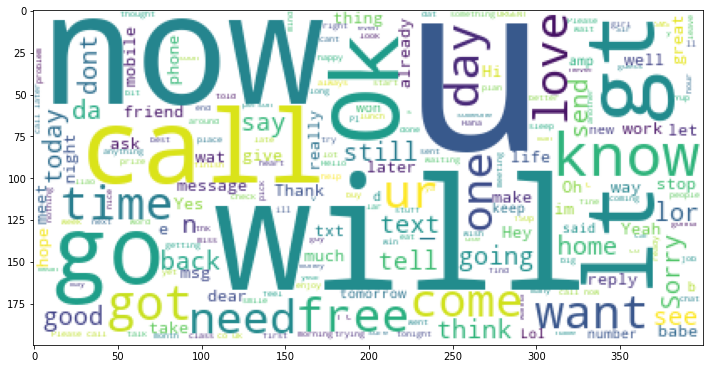

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(review_wordcloud)
plt.show()

In [ ]:
word_count = {}
for word in corpus.split():
    if word in word_count:
        word_count[word] = word_count[word] + 1
    else:
        word_count[word] = 1

In [ ]:
word_count

{'Go': 14,
 'until': 26,
 'jurong': 1,
 'point,': 1,
 'crazy..': 1,
 'Available': 3,
 'only': 147,
 'in': 798,
 'bugis': 4,
 'n': 137,
 'great': 75,
 'world': 17,
 'la': 2,
 'e': 71,
 'buffet...': 1,
 'Cine': 1,
 'there': 118,
 'got': 204,
 'amore': 1,
 'wat...': 12,
 'Ok': 97,
 'lar...': 18,
 'Joking': 1,
 'wif': 26,
 'u': 692,
 'oni...': 2,
 'Free': 39,
 'entry': 25,
 '2': 453,
 'a': 1327,
 'wkly': 10,
 'comp': 10,
 'to': 2134,
 'win': 38,
 'FA': 4,
 'Cup': 3,
 'final': 13,
 'tkts': 4,
 '21st': 3,
 'May': 16,
 '2005.': 3,
 'Text': 42,
 '87121': 4,
 'receive': 34,
 'question(std': 2,
 'txt': 75,
 "rate)T&C's": 2,
 'apply': 15,
 "08452810075over18's": 2,
 'U': 299,
 'dun': 46,
 'say': 72,
 'so': 294,
 'early': 24,
 'hor...': 2,
 'c': 44,
 'already': 45,
 'then': 146,
 'say...': 3,
 'Nah': 7,
 'I': 1466,
 "don't": 110,
 'think': 113,
 'he': 127,
 'goes': 26,
 'usf,': 2,
 'lives': 2,
 'around': 53,
 'here': 75,
 'though': 15,
 'FreeMsg': 5,
 'Hey': 76,
 'darling': 4,
 "it's": 53,
 'been'

In [ ]:
top_15_word = pd.Series(corpus.split()).value_counts().head(15)
top_15_word

to      2134
you     1622
I       1466
a       1327
the     1197
and      857
in       798
is       781
i        742
u        692
for      644
my       628
of       591
your     560
me       557
dtype: int64

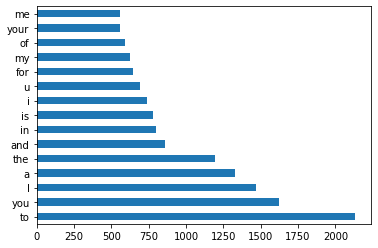

In [ ]:
top_15_word.plot(kind = "barh")

In [ ]:
pd.Series(corpus.split()).value_counts()

to        2134
you       1622
I         1466
a         1327
the       1197
          ... 
page.        1
DIDN'T       1
rupaul       1
TOOL!        1
Rofl.        1
Length: 15583, dtype: int64

In [ ]:
pd.Series(corpus.split()).nunique()

15583

In [ ]:
X = dataset.v2
Y = dataset.v1
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
tokenizer = Tokenizer(num_words=2000,lower=True)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train=sequence.pad_sequences(sequences,maxlen=200)

##4. Create Model

In [ ]:
model = Sequential()

##5. Add Layers(LSTM,Dense,Hidden-Layers,Output)

In [ ]:
model.add(Embedding(2000,50,input_length=200))
model.add(LSTM(64))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           100000    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


##6. Compile the Model

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=RMSprop(),metrics=['accuracy'])

##7. Fit the Model

In [ ]:
model.fit(X_train,y_train,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
28/28 [==============================] - 8s 36ms/step - loss: 0.3125 - accuracy: 0.8898 - val_loss: 0.1360 - val_accuracy: 0.9742
Epoch 2/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0829 - accuracy: 0.9804 - val_loss: 0.0509 - val_accuracy: 0.9854
Epoch 3/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0353 - accuracy: 0.9910 - val_loss: 0.0546 - val_accuracy: 0.9854
Epoch 4/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 5/20
28/28 [==============================] - 0s 16ms/step - loss: 0.0130 - accuracy: 0.9961 - val_loss: 0.0759 - val_accuracy: 0.9865
Epoch 6/20
28/28 [==============================] - 0s 17ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0518 - val_accuracy: 0.9910
Epoch 7/20
28/28 [==============================] - 1s 35ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0567 - val_accuracy: 0.9888
Epoch 8/20
28

##8.save the Model

In [ ]:
model.save("spam_Model.h5")

##9. Test the Model

In [ ]:
max_len = 150
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = keras.utils.pad_sequences(test_sequences,maxlen=max_len)
acc = model.evaluate(test_sequences_matrix,y_test)

35/35 [==============================] - 1s 8ms/step - loss: 0.2493 - accuracy: 0.9794


In [ ]:
def predict(message):
    t = tokenizer.texts_to_sequences(message)
    t = sequence.pad_sequences(t, maxlen=200)
    predicts = model.predict(t)
    if predicts > 0.5:
        print("Spam")
    else:
        print("Not Spam")

### Test 1 : Not Spam Message

In [ ]:
predict(["Today Class for you!!"])

1/1 [==============================] - 0s 21ms/step
Not Spam


###Test 2 : Spam Message

In [ ]:
predict(["You have offer for buying new mobile"])

1/1 [==============================] - 0s 21ms/step
Spam


In [ ]:
!jupyter nbconvert --to pdf Assignment4.ipynb

[NbConvertApp] Converting notebook Assignment4.ipynb to pdf
[NbConvertApp] Support files will be in Assignment4_files/
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Making directory ./Assignment4_files
[NbConvertApp] Writing 72779 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 257851 bytes to Assignment4.pdf
